# ИУ5-62Б Бабин А.С.
## Рубежный контроль №1 (вариант 2)

### Задание
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.
### Набор данных
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

### Дополнительное требование
Для произвольной колонки данных построить гистограмму.

## Решение

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Пропуски в данных не обнаружены.**
<br></br>
<br></br>

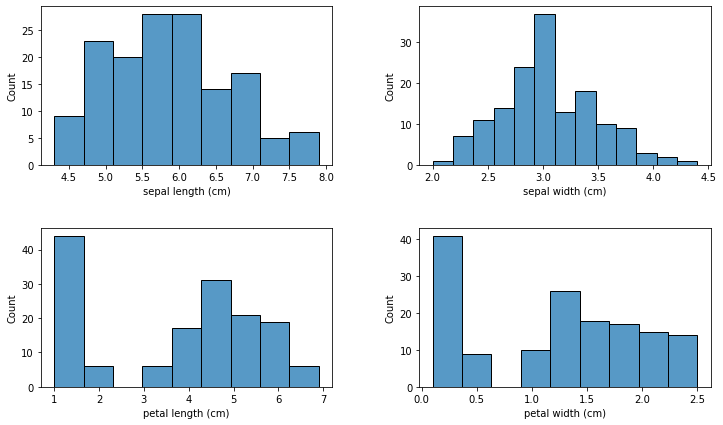

In [5]:
_, axes = plt.subplots(2, 2, figsize=(12, 7))
sns.histplot(data['sepal length (cm)'], ax=axes[0][0])
sns.histplot(data['sepal width (cm)'], ax=axes[0][1])
sns.histplot(data['petal length (cm)'], ax=axes[1][0])
sns.histplot(data['petal width (cm)'], ax=axes[1][1])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

<br></br>

**Корреляционный анализ**

In [6]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


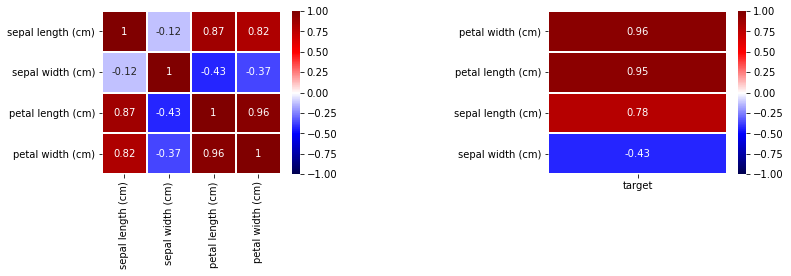

In [7]:
_, axes = plt.subplots(1, 2, figsize=(12, 3))
sns.heatmap(data.drop('target', axis=1).corr(), annot=True, vmin=-1, vmax=1, cmap='seismic', linewidth=1, ax=axes[0])
sns.heatmap(pd.DataFrame(data.corr()['target'].sort_values(ascending=False)[1:]), 
            annot=True, vmin=-1, vmax=1, cmap='seismic', linewidth=1, ax=axes[1])
plt.subplots_adjust(wspace=1)
plt.show()

Выше представлены матрица корреляций признаков между собой и матрица корреляции между признаками и прогнозируемой величиной. Из значений первой матрицы видим крайне высокую корреляцию между следующими парами признаков:
- `sepal length (cm)` и `petal length (cm)`
- `sepal length (cm)` и `petal width (cm)`
- `petal length (cm)` и `petal width (cm)`

Так как одновременное использование этих пар признаков в моделях машинного обучения привело бы к мультиколлинеарности, следует оставить только один признак из этого множества. Вторая матрица демонстрирует, что наибольшая связь наблюдается между прогнозируемой величиной и признаком `petal width (cm)`, поэтому логичнее оставить именно его, так как его вклад в модель обучения будет наибольшим. У признака `sepal width (cm)` взаимосвязь с остальными не слишком высокая и при этом некоторая корреляция с прогнозируемой величиной имеется, поэтому оставляем его.

Таким образом, в результате корреляционного анализа было принято решение в первую очередь пробовать использовать в моделях машинного обучения для прогноза величины `target` 2 признака: `petal width (cm)` и `sepal width (cm)`.